# Overfitting demo

## Create a sample dataset
Let's look at a synthetic dataset consisting of 30 points drawn from the sinusoid $y = \sin(x)$:

In [1]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['patch.linewidth'] = 0

Create a random set of points near the function $y=sin(x)$.

In [7]:
# n is the number of points 
n = 30

# Set the random seed, so that we get the same results every time.
# https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.random.seed.html
numpy.random.seed(10)

# Let x be n points selected uniformly at random between 0 and 2.7
# https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.random.uniform.html
x = numpy.random.uniform(0,2.7,n)
print("x = ")
print(x)

x = 
[ 2.08256574  0.05603026  1.71085023  2.02177048  1.34596893  0.60695094
  0.53476973  2.05343292  0.45659926  0.2385175   1.85047151  2.57416203
  0.01066032  1.38291911  2.1940766   1.65382038  1.94873936  0.78806538
  2.47799013  1.92935462  1.46486979  0.38385913  1.00802005  1.82016076
  1.19294957  1.17183778  1.66797084  1.38547325  1.75607239  1.62280517]


In [8]:
# Let y be sin(x), and add normally-distributed noise.
y = numpy.sin(x)
y += numpy.random.normal(0,0.2,n)
print("y = ")
print(y)

y = 
[ 0.8917092   0.33560023  0.93595887  1.02266379  0.92136916  0.46050384
  0.5361846   0.79054591  0.70259292  0.27526501  1.04118715  0.46994064
  0.26195457  0.83600903  0.94401444  0.9263811   0.74153897  0.61112283
  0.4550406   0.8938642   0.92656698  0.43693552  0.95880766  0.93958542
  0.9242801   0.9792849   0.88730646  1.12450878  1.15133038  1.039364  ]


## Create a function to plot the data, since we'll do it many times

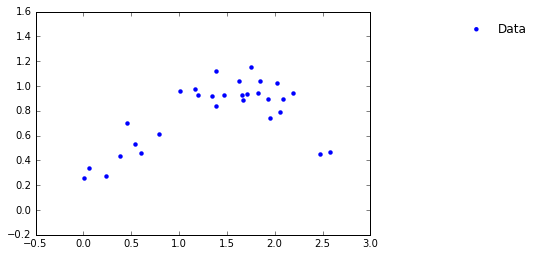

In [9]:
plt.scatter(x, y, label='Data')

def plt_show():
    plt.legend(scatterpoints=1, bbox_to_anchor=(1.5, 1))
    plt.xlim([-0.5, 3.0])
    plt.ylim([-0.2, 1.6])
    plt.show()
plt_show()

## Do a linear fit

In [10]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
polynomial_coefficients = numpy.polyfit(x, y, deg=1)
print(polynomial_coefficients)

[ 0.1970768   0.50880222]


In [11]:
# Convert from a vector of coefficients to a polynomial.
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html
p = numpy.poly1d(polynomial_coefficients)
print(p)

 
0.1971 x + 0.5088


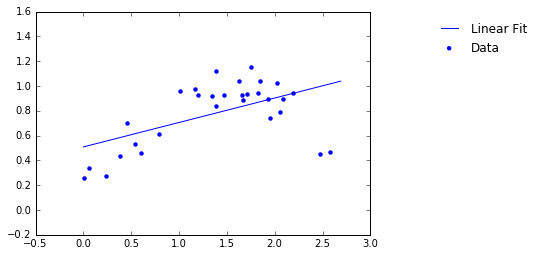

In [12]:
# Let x_line be a uniform sampling from 0 to 2.7.
# When we evaluate our polynomial fits, we'll evaluate it at each of these
# points.
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html
x_line = numpy.arange(0, 2.7, 0.01)
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyval.html
y_line = numpy.polyval(p, x_line)
plt.plot(x_line, y_line, label='Linear Fit')
plt.scatter(x, y, label='Data')
plt_show()

In [13]:
y_predicted = numpy.polyval(p, x)
rms_error = numpy.sqrt(numpy.mean((y - y_predicted) ** 2))
print('RMS error: ' + str(rms_error))

RMS error: 0.214864688485


In [14]:
# Let's create a function for compute RMS error
def ComputeRMS(p, x, y):
    y_predicted = numpy.polyval(p, x)
    return numpy.sqrt(numpy.mean((y - y_predicted) ** 2))

## Fit a degree-2 polynomial

         2
-0.3709 x + 1.113 x + 0.1347


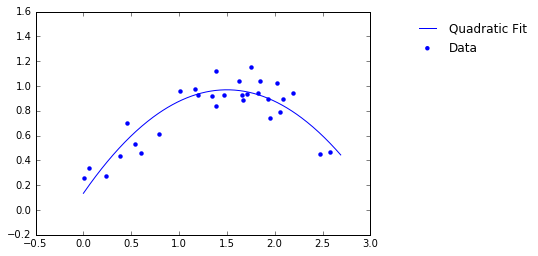

RMS error: 0.112584133014


In [15]:
p = numpy.poly1d(numpy.polyfit(x, y, deg=2))
print(p)

plt.scatter(x, y, label='Data')
plt.plot(x_line, numpy.polyval(p, x_line), label='Quadratic Fit')
plt_show()

rms_error = ComputeRMS(p, x, y)
print('RMS error: ' + str(rms_error))

## Fit a degree-4 polynomial

         4          3          2
0.04094 x - 0.3563 x + 0.5448 x + 0.3266 x + 0.2686


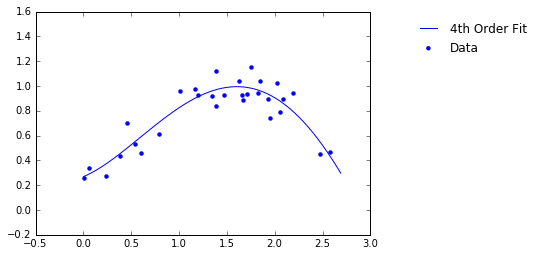

RMS error: 0.0998458472194


In [16]:
p = numpy.poly1d(numpy.polyfit(x, y, deg=4))
print(p)

plt.scatter(x, y, label='Data')
plt.plot(x_line, numpy.polyval(p, x_line), label='4th Order Fit')
plt_show()

rms_error = ComputeRMS(p, x, y)
print('RMS error: ' + str(rms_error))

## Fit a degree-10 polynomial

        10         9         8         7       6         5         4
0.8384 x  - 10.84 x + 60.28 x - 188.7 x + 364 x - 445.7 x + 342.4 x
          3         2
 - 157.3 x + 39.16 x - 3.723 x + 0.3507


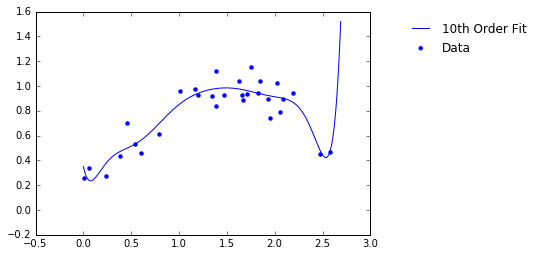

RMS error: 0.0953891484174


In [17]:
p = numpy.poly1d(numpy.polyfit(x, y, deg=10))
print(p)

plt.scatter(x, y, label='Data')
plt.plot(x_line, numpy.polyval(p,x_line), label='10th Order Fit')
plt_show()

rms_error = ComputeRMS(p, x, y)
print('RMS error: ' + str(rms_error))

## Fit a degree-16 polynomial

       16        15             14             13             12
70.89 x  - 1511 x  + 1.464e+04 x  - 8.545e+04 x  + 3.348e+05 x 
              11             10             9             8
 - 9.303e+05 x  + 1.886e+06 x  - 2.828e+06 x + 3.145e+06 x
              7             6            5             4             3
 - 2.576e+06 x + 1.526e+06 x - 6.35e+05 x + 1.767e+05 x - 3.029e+04 x
         2
 + 2764 x - 97.64 x + 1.023


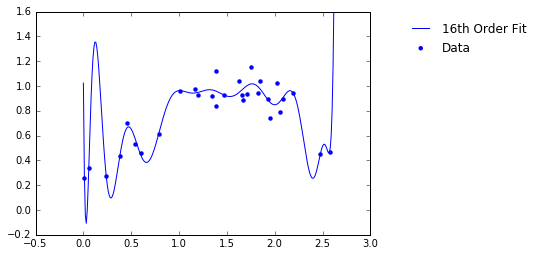

RMS error: 0.0714575315342


In [18]:
p = numpy.poly1d(numpy.polyfit(x, y, deg=16))
print(p)

plt.scatter(x, y, label='Data')
plt.plot(x_line, numpy.polyval(p,x_line), label='16th Order Fit')
plt_show()

rms_error = ComputeRMS(p, x, y)
print('RMS error: ' + str(rms_error))

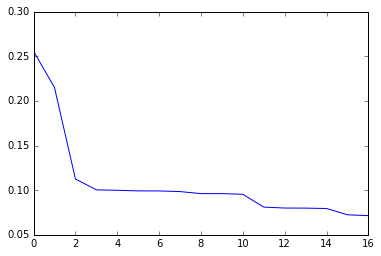

In [19]:
# This "feels" wrong, but our RMS error is going down!
# Maybe we're computing the RMS error of the wrong thing!
max_degree = 17
rms_errors = numpy.zeros(max_degree)
for order in range(max_degree):
    p = numpy.poly1d(numpy.polyfit(x, y, deg=order))
    rms_errors[order] = ComputeRMS(p, x, y)
plt.plot(rms_errors)
plt.show() 

# 2-Fold Validation

In [20]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html
numpy.random.seed(3)
shuffle = numpy.arange(n)
print('Before:')
print(shuffle)
numpy.random.shuffle(shuffle)
print('After:')
print(shuffle)

Before:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
After:
[15  5 22 26 18 14 13  2 16  1 17 27  7 12  4 23  6 20  9 11 29 19 21  0  8
 28  3 25 24 10]


In [23]:
train_indices = shuffle[0:n//2]
print(train_indices)
test_indices = shuffle[n//2:n]
x_train = x[train_indices]
y_train = y[train_indices]
x_test = x[test_indices]
y_test = y[test_indices]

[15  5 22 26 18 14 13  2 16  1 17 27  7 12  4]


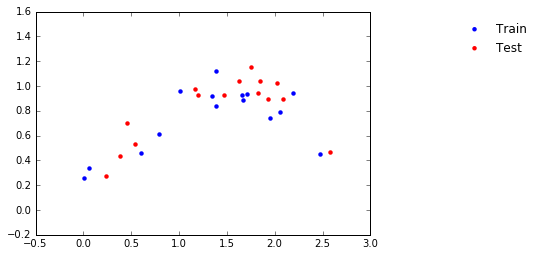

In [24]:
plt.scatter(x_train, y_train, label='Train', color='b')
plt.scatter(x_test, y_test, label='Test', color='r')
plt_show()

In [25]:
p = numpy.poly1d(numpy.polyfit(x_train, y_train, deg=1))
print(p)

 
0.1898 x + 0.4892


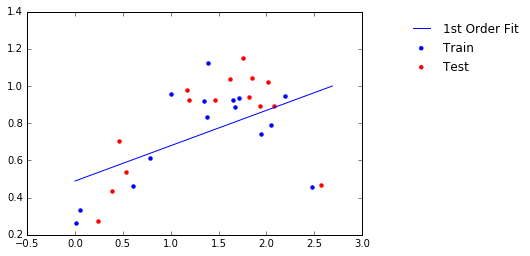

In [26]:
plt.scatter(x_train, y_train, label='Train', color='b')
plt.scatter(x_test, y_test, label='Test', color='r')
plt.plot(x_line, numpy.polyval(p,x_line), label='1st Order Fit')
plt.legend(scatterpoints=1, bbox_to_anchor=(1.5, 1))
plt.show()

In [27]:
rms_error = ComputeRMS(p, x_test, y_test)
print('RMS error on test set: ' + str(rms_error))

RMS error on test set: 0.222440670628


         2
-0.3288 x + 0.9691 x + 0.2036


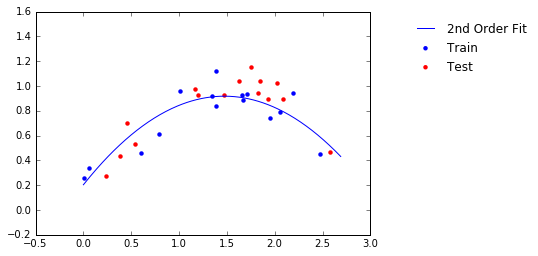

RMS error on test set: 0.124687483032


In [28]:
# Fit a second order polynomial fit on the training data
p = numpy.poly1d(numpy.polyfit(x_train, y_train, deg=2))
print(p)

# Plot it
plt.scatter(x_train, y_train, label='Train', color='b')
plt.scatter(x_test, y_test, label='Test', color='r')
plt.plot(x_line, numpy.polyval(p,x_line), label='2nd Order Fit')
plt_show()

# Compute the RMS error on the test set
rms_error = ComputeRMS(p, x_test, y_test)
print('RMS error on test set: ' + str(rms_error))

        4          3         2
0.1392 x - 0.8612 x + 1.378 x - 0.1508 x + 0.2921


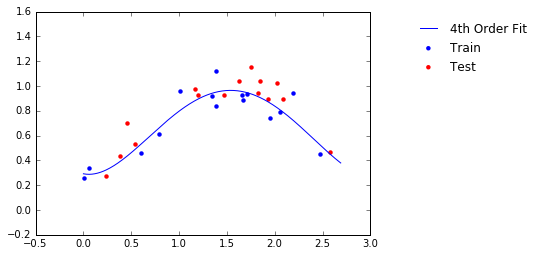

RMS error on test set: 0.118580608242


In [29]:
# Same thing with a 4th order polynomial
p = numpy.poly1d(numpy.polyfit(x_train, y_train, deg=4))
print(p)

# Plot it
plt.scatter(x_train, y_train, label='Train', color='b')
plt.scatter(x_test, y_test, label='Test', color='r')
plt.plot(x_line, numpy.polyval(p,x_line), label='4th Order Fit')
plt_show()

# Compute the RMS error on the test set
rms_error = ComputeRMS(p, x_test, y_test)
print('RMS error on test set: ' + str(rms_error))

       10         9         8        7        6        5        4
7.449 x  - 96.29 x + 532.7 x - 1645 x + 3096 x - 3636 x + 2606 x
         3         2
 - 1054 x + 198.1 x - 8.053 x + 0.3265


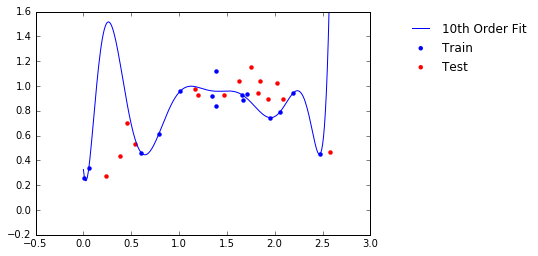

RMS error on test set: 0.523945261129


In [30]:
# Same thing with a 10th order polynomial
p = numpy.poly1d(numpy.polyfit(x_train, y_train, deg=10))
print(p)

# Plot it
plt.scatter(x_train, y_train, label='Train', color='b')
plt.scatter(x_test, y_test, label='Test', color='r')
plt.plot(x_line, numpy.polyval(p,x_line), label='10th Order Fit')
plt_show()

# Compute the RMS error on the test set
y_test_hat = numpy.polyval(p, x_test)
rms_error = numpy.sqrt(numpy.mean((y_test - y_test_hat) ** 2))
print('RMS error on test set: ' + str(rms_error))

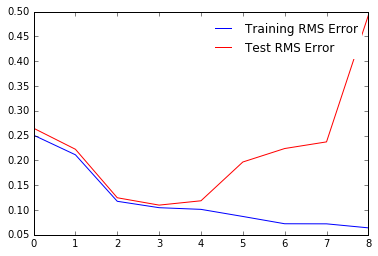

In [31]:
# Perform the full 2-fold cross validation
max_degree = 9
train_rms_errors = numpy.zeros(max_degree) 
test_rms_errors = numpy.zeros(max_degree)
for order in range(max_degree):
    p = numpy.poly1d(numpy.polyfit(x_train, y_train, deg=order))
    train_rms_errors[order] = ComputeRMS(p, x_train, y_train)
    test_rms_errors[order] = ComputeRMS(p, x_test, y_test)
plt.plot(train_rms_errors, label='Training RMS Error', c='b')
plt.plot(test_rms_errors, label='Test RMS Error', c='r')
plt.legend()
plt.show()

# Full Leave-One-Out Cross Validation

In [2]:
test_rms_errors = numpy.zeros(max_degree)
train_rms_errors = numpy.zeros(max_degree)
for order in range(max_degree):
    test_sample_errors = numpy.zeros(n)
    train_sample_errors = numpy.zeros(n)
    for i in range(n):
        x_test = x[i]
        y_test = y[i]
        x_train = numpy.delete(x, i)
        y_train = numpy.delete(y, i)
        p = numpy.poly1d(numpy.polyfit(x_train, y_train, deg=order))
        test_sample_errors[i] = ComputeRMS(p, x_test, y_test)
        train_sample_errors[i] = ComputeRMS(p, x_train, y_train)
    test_rms_errors[order] = numpy.mean(test_sample_errors)
    train_rms_errors[order] = numpy.mean(train_sample_errors)
plt.plot(train_rms_errors, label='Training RMS Error', c='b')
plt.plot(test_rms_errors, label='Test RMS Error', c='r')
plt.legend()
plt.show()

NameError: name 'max_degree' is not defined